# Savitzky-Golay Filter

In [4]:
import sympy as sp

# Pretty printing in notebooks
sp.init_printing(use_unicode=True)

# ## Symbols and indexed control points

# %%
t = sp.symbols('t', real=True)
k = sp.symbols('k', integer=True)

a0, a1, a2 = sp.symbols('a_0 a_1 a_2', real=True)


# Indexed bases for x/y components
p = sp.IndexedBase('p')
#a0 = sp.IndexedBase('a_0')
#a1 = sp.IndexedBase('a_1')
#a2 = sp.IndexedBase('a_2')
u = sp.IndexedBase('u')

#U m = g

#Qx = sp.IndexedBase('Qx')
#Qy = sp.IndexedBase('Qy')
#P1x = sp.IndexedBase('P1x')
#P1y = sp.IndexedBase('P1y')
#P2x = sp.IndexedBase('P2x')
#P2y = sp.IndexedBase('P2y')

# %% [markdown]
# ## Build the 2D control points for segment k

# %%
#P0 = sp.Matrix([Qx[k],    Qy[k]])          # Q_k
#P1 = sp.Matrix([P1x[k],   P1y[k]])         # P1_k
#P2 = sp.Matrix([P2x[k],   P2y[k]])         # P2_k
#P3 = sp.Matrix([Qx[k+1],  Qy[k+1]])        # Q_{k+1}

#P0, P1, P2, P3

In [5]:
# Print Name = Expression
def label(name, expression):
    sym = sp.Symbol(name)
    display(sp.Eq(sym, expression, evaluate=False))
    

In [49]:
U = sp.Matrix()
g = sp.Matrix()
for i in range(0, 5):
    U = U.row_insert(i, sp.Matrix([u[k]**2, u[k], 1]).transpose().subs(k, i))
    g = g.row_insert(i, sp.Matrix([p[k]]).subs(k, i))
    #print(U)
label('U', U)
label('g', g)

    ⎡    2         ⎤
    ⎢u[0]   u[0]  1⎥
    ⎢              ⎥
    ⎢    2         ⎥
    ⎢u[1]   u[1]  1⎥
    ⎢              ⎥
    ⎢    2         ⎥
U = ⎢u[2]   u[2]  1⎥
    ⎢              ⎥
    ⎢    2         ⎥
    ⎢u[3]   u[3]  1⎥
    ⎢              ⎥
    ⎢    2         ⎥
    ⎣u[4]   u[4]  1⎦

    ⎡p[0]⎤
    ⎢    ⎥
    ⎢p[1]⎥
    ⎢    ⎥
g = ⎢p[2]⎥
    ⎢    ⎥
    ⎢p[3]⎥
    ⎢    ⎥
    ⎣p[4]⎦

In [50]:
m = sp.Matrix([a2, a1, a0])
label('m', m)

    ⎡a₂⎤
    ⎢  ⎥
m = ⎢a₁⎥
    ⎢  ⎥
    ⎣a₀⎦

In [54]:
U.T*U

⎡    4       4       4       4       4      3       3       3       3       3  ↪
⎢u[0]  + u[1]  + u[2]  + u[3]  + u[4]   u[0]  + u[1]  + u[2]  + u[3]  + u[4]   ↪
⎢                                                                              ↪
⎢    3       3       3       3       3      2       2       2       2       2  ↪
⎢u[0]  + u[1]  + u[2]  + u[3]  + u[4]   u[0]  + u[1]  + u[2]  + u[3]  + u[4]   ↪
⎢                                                                              ↪
⎢    2       2       2       2       2                                         ↪
⎣u[0]  + u[1]  + u[2]  + u[3]  + u[4]     u[0] + u[1] + u[2] + u[3] + u[4]     ↪

↪      2       2       2       2       2⎤
↪  u[0]  + u[1]  + u[2]  + u[3]  + u[4] ⎥
↪                                       ⎥
↪                                       ⎥
↪    u[0] + u[1] + u[2] + u[3] + u[4]   ⎥
↪                                       ⎥
↪                                       ⎥
↪                    5                  ⎦

In [56]:
sp.det(U.T*U)

In [55]:
U.T

⎡    2      2      2      2      2⎤
⎢u[0]   u[1]   u[2]   u[3]   u[4] ⎥
⎢                                 ⎥
⎢u[0]   u[1]   u[2]   u[3]   u[4] ⎥
⎢                                 ⎥
⎣  1      1      1      1      1  ⎦

In [57]:
#I = ((U.T*U)**(-1))*U.T
#I

In [30]:
U = sp.Matrix()

[]

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data = np.array([1, 1.6, 1.4, 1.9, 1.7])
data

array([1. , 1.6, 1.4, 1.9, 1.7])

In [161]:
time = []
dt = 0.1
for i in range(0, 5):
    time.append(i*dt)
time = np.array(time) - (time[-1]-time[0])/2
time

array([-0.2, -0.1,  0. ,  0.1,  0.2])

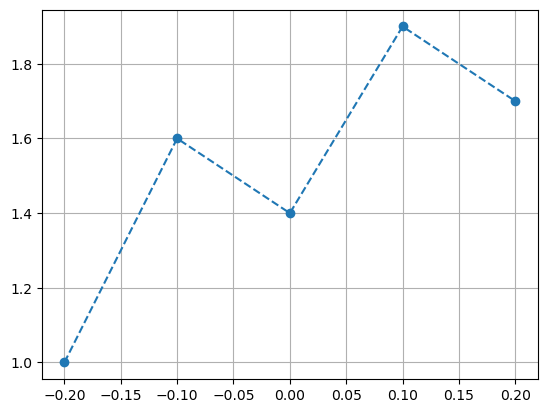

In [162]:
plt.plot(time, data, 'o--')
plt.grid()

In [163]:
#U m = g

In [164]:
Un = np.empty((0,3))
gn = np.array([])
for i in range(0, 5):
    ti = time[i]
    di = data[i]
    Un = np.vstack([Un, [ti**2, ti, 1]])
    gn = np.append(gn, di)

print(Un)
print(gn)

[[ 0.04 -0.2   1.  ]
 [ 0.01 -0.1   1.  ]
 [ 0.    0.    1.  ]
 [ 0.01  0.1   1.  ]
 [ 0.04  0.2   1.  ]]
[1.  1.6 1.4 1.9 1.7]


In [165]:
m = np.linalg.inv(Un.T @ Un) @ Un.T @ gn 
m

array([-6.42857143,  1.7       ,  1.64857143])

In [166]:
m

array([-6.42857143,  1.7       ,  1.64857143])

In [167]:
t_vals = np.linspace(time[0], time[-1], 20)
y_vals = np.array([m[0]*v**2 + v*m[1] + m[2] for v in t_vals])
print(t_vals)
print(y_vals)

[-0.2        -0.17894737 -0.15789474 -0.13684211 -0.11578947 -0.09473684
 -0.07368421 -0.05263158 -0.03157895 -0.01052632  0.01052632  0.03157895
  0.05263158  0.07368421  0.09473684  0.11578947  0.13684211  0.15789474
  0.17894737  0.2       ]
[1.05142857 1.13850416 1.21988128 1.29555995 1.36554017 1.42982192
 1.48840522 1.54129007 1.58847645 1.62996438 1.66575386 1.69584488
 1.72023744 1.73893154 1.75192719 1.75922438 1.76082311 1.75672339
 1.74692521 1.73142857]


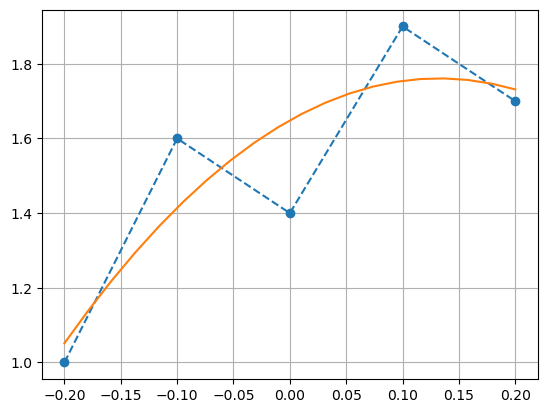

In [168]:
plt.plot(time, data, 'o--')
plt.plot(t_vals, y_vals)
plt.grid()
plt.show()

In [169]:
m

array([-6.42857143,  1.7       ,  1.64857143])

In [35]:
i=2
U.row_insert(i, sp.Matrix([u[k]**2, u[k], 1]).transpose().subs(k, i))

⎡    2         ⎤
⎣u[2]   u[2]  1⎦

In [36]:
U

[]

In [15]:
U = sp.Matrix([u[k]**2, u[k], 1]).T

In [16]:
U

⎡    2         ⎤
⎣u[k]   u[k]  1⎦

In [17]:
U.subs(k, 0)

⎡    2         ⎤
⎣u[0]   u[0]  1⎦

In [29]:
U.row_insert(1, sp.Matrix([u[k]**2, u[k], 1]).T)

⎡    2         ⎤
⎣u[k]   u[k]  1⎦

In [22]:
A = sp.Matrix()

In [23]:
A

[]

In [24]:
A.row_insert(0, sp.Matrix([1,2,3]).T)

[1  2  3]

In [108]:
import numpy as np

arr = np.array([])   # empty 1D array

arr = np.append(arr, 1)
arr = np.append(arr, 2)
arr = np.append(arr, 3)

print(arr)


[1. 2. 3.]
